### Singlephotoelectron mini analysis: SPE acceptance

The plugIn for getting the LED data can be find here: https://github.com/XENONnT/straxen/blob/led_plugin/straxen/plugins/led_calibration.py.

The motivation for this analysis is to estimate the SPE acceptance using low-intensity LED runs.

After changing the configuration, the led_calibration plugin will give the amplitude of LED and of the noise. With the spectrums the SPE acceptance will be computed.

In [1]:
%run '/home/gvolta/XENONnT/LedAnalysis/Initialization_for_SPE.py'

0.0.8


In [2]:
st_2 = st.new_context(config=dict(LED_window=(138,188), noise_window=(400, 450)))
# st_2.data_info('led_calibration')
# st_2.show_config('led_calibration')

In [3]:
runs = st_2.select_runs(run_mode='LED*')
# runs

Checking data availability: 100%|██████████| 5/5 [00:27<00:00,  4.93s/it]


In [4]:
run_id = '180219_1049'
data_SPE = st_2.get_array(run_id, 'led_calibration')

In [5]:
run_id = '180219_1049'
data_rr = st.get_array(run_id, 'raw_records', seconds_range=(0,20))

#### LED windows = [138, 188]
#### Noise windwos = [400, 450]

Let's check few random waveforms from different channels in these two windows.

Start 25: 2018-02-19 10:50:00.034530130
Start 151: 2018-02-19 10:50:00.024699790


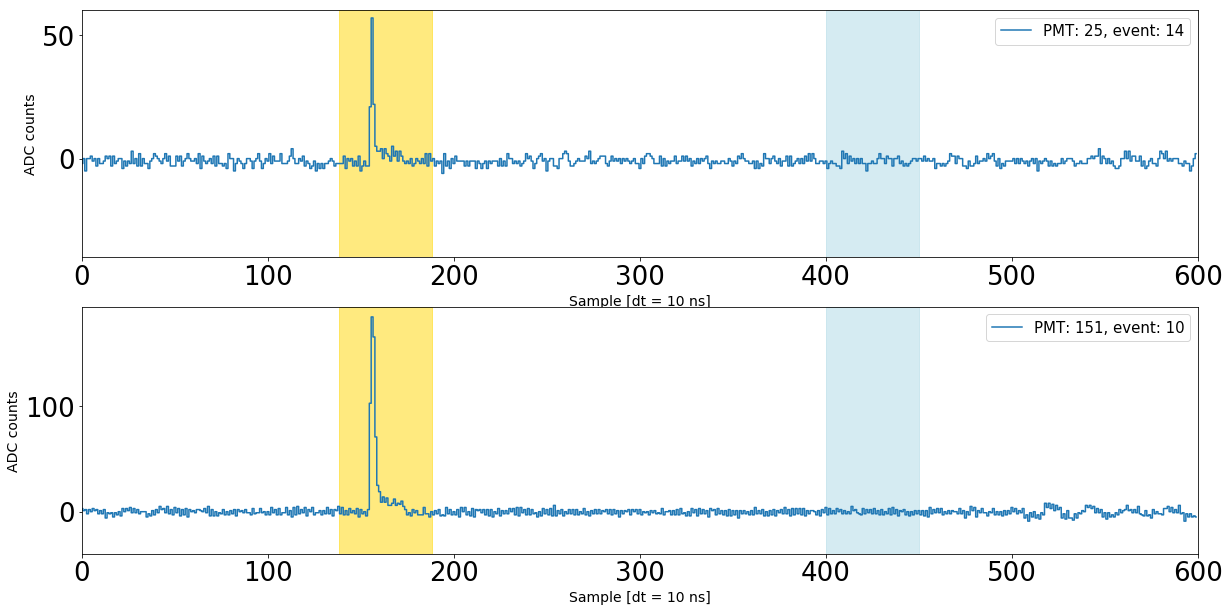

In [6]:
plt.figure(figsize=(20,10))
###################################################################
PMT_n = data_rr[data_rr['channel']==25]
plt.subplot(211)
event = 14
plot_peak(PMT_n[event], label = 'PMT: ' + str(PMT_n[event]['channel']) + ', event: ' + str(event))
plt.axvspan(138, 188, alpha=0.5, color='gold')
plt.axvspan(400, 450, alpha=0.5, color='lightblue')
plt.legend(loc='best', fontsize=15)
plt.ylim(bottom = -40)
plt.xlim(0, 600)
###################################################################
PMT_n = data_rr[data_rr['channel']==151]
plt.subplot(212)
event = 10
plot_peak(PMT_n[event], label = 'PMT: ' + str(PMT_n[event]['channel']) + ', event: ' + str(event))
plt.axvspan(138, 188, alpha=0.5, color='gold')
plt.axvspan(400, 450, alpha=0.5, color='lightblue')
plt.legend(loc='best', fontsize=15)
plt.ylim(bottom = -40)
plt.xlim(0, 600)
###################################################################
plt.show()

### SPE accepante

- Evan's note: https://xe1t-wiki.lngs.infn.it/doku.php?id=xenon:saldanha:xe1t:single_photoelectron_amplitude


In [7]:
SPE = ScalingSpectrum(data = data_SPE)

100%|██████████| 249/249 [01:58<00:00,  2.11it/s]


In [8]:
SPE['spectrumNOISE_scaled_7bin']

array([array([6.21592664e+03, 6.51181091e+04, 7.70187486e+04, 2.43333993e+04,
       3.21629105e+03, 1.91273228e+02, 7.25206550e+00, 2.71952456e+00,
       9.06508187e-01, 0.00000000e+00, 1.81301637e+00, 9.06508187e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       9.06508187e-01, 1.81301637e+00, 9.06508187e-01, 1.81301637e+00,
       1.81301637e+00, 9.06508187e-01, 2.71952456e+00, 1.81301637e+00,
       3.62603275e+00, 1.81301637e+00, 2.71952456e+00, 1.81301637e+00,
       1.81301637e+00, 1.81301637e+00, 9.06508187e-01, 1.81301637e+00,
       1.81301637e+00, 9.06508187e-01, 9.06508187e-01, 2.71952456e+00,
       9.06508187e-01, 9.06508187e-01, 9.06508187e-01, 0.00000000e+00,
       1.81301637e+00, 9.06508187e-01, 9.06508187e-01, 0.00000000e+00,
       0.00000000e+00, 9.06508187e-01, 9.06508187e-01, 0.00000000e+00,
       0.00000000e+00, 9.06508187e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.81301637e+00, 0.00000000e+00, 0.00000000e+00,

### We are interested into two value for the SPE acceptance:
1) Looking for the the SPE acceptance at 15 ADC as threshold

2) Looking for the threshold such that the SPE acceptance is 90%

In [9]:
SPE_acceptance = SPE_Acceptance(data = SPE)

100%|██████████| 249/249 [00:00<00:00, 4781.88it/s]


In [10]:
SPE_acceptance['SPE acceptance 7 bin']

array([array([8.78803449e-01, 7.50563458e-01, 6.80173590e-01, 6.07345403e-01,
       5.92702557e-01, 5.88644659e-01, 5.82664832e-01, 5.77660599e-01,
       5.72470228e-01, 5.67058705e-01, 5.61609174e-01, 5.56066574e-01,
       5.49310176e-01, 5.42169528e-01, 5.34612608e-01, 5.25582730e-01,
       5.16005503e-01, 5.05112428e-01, 4.92877472e-01, 4.79198583e-01,
       4.64014715e-01, 4.46048027e-01, 4.27659081e-01, 4.07095711e-01,
       3.86238166e-01, 3.64009712e-01, 3.38960430e-01, 3.15066892e-01,
       2.89540291e-01, 2.66767482e-01, 2.42172479e-01, 2.18278941e-01,
       1.95794320e-01, 1.72448130e-01, 1.52368067e-01, 1.33210620e-01,
       1.15884349e-01, 1.00351245e-01, 8.61309964e-02, 7.30664915e-02,
       6.19812916e-02, 5.23720443e-02, 4.46520269e-02, 3.75433992e-02,
       3.17156053e-02, 2.66212972e-02, 2.28078230e-02, 1.86130922e-02,
       1.58913204e-02, 1.39030343e-02, 1.18857210e-02, 9.99649113e-03,
       8.39544886e-03, 7.33277359e-03, 6.46821076e-03, 5.34748118e-03,

In [13]:
top_pos_x = []
top_pos_y = []
bot_pos_x = []
bot_pos_y = []
acc_top = []
thr_top = []
acc_bot = []
thr_bot = []
bin_correction = 3
for i in range(0,127):
        top_pos_x.append(PMT_positions[i]['x'])
        top_pos_y.append(PMT_positions[i]['y'])
        acc_top.append(SPE_acceptance[i]['Acceptance @ 15 ADC '+str(bin_correction)+' bin']*100)
        thr_top.append(SPE_acceptance[i]['Threshold for 0.9 acceptance '+str(bin_correction)+' bin'])
for i in range(127,248):
        bot_pos_x.append(PMT_positions[i]['x'])
        bot_pos_y.append(PMT_positions[i]['y'])
        acc_bot.append(SPE_acceptance[i]['Acceptance @ 15 ADC '+str(bin_correction)+' bin']*100)
        thr_bot.append(SPE_acceptance[i]['Threshold for 0.9 acceptance '+str(bin_correction)+' bin'])

#################################################
############### Bin Correction: 3 ###############
#################################################


(-52.690000000000005,
 52.690000000000005,
 -53.24317447572439,
 53.24317447572439)

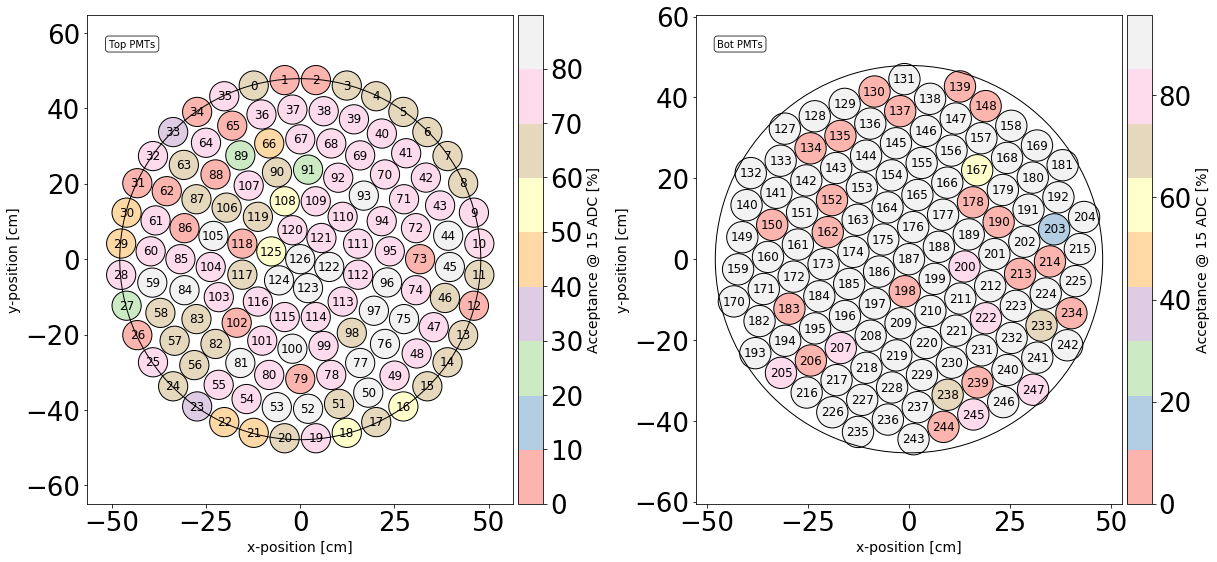

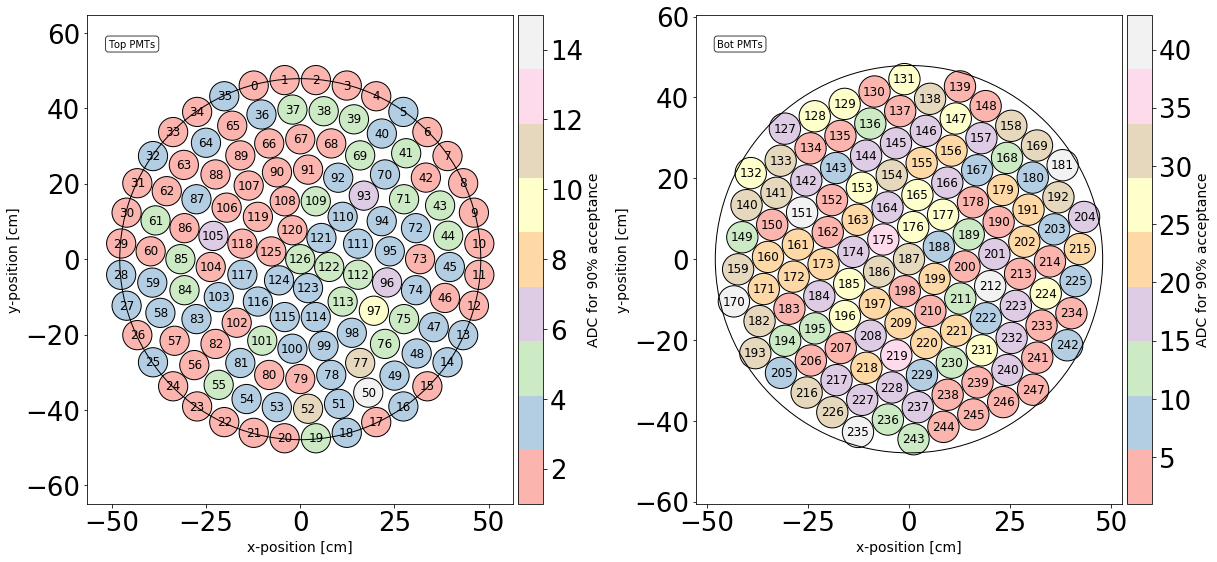

In [17]:
################################# Looking for the the SPE acceptance at 15 ADC as threshold #################################

print('#################################################')
print('############### Bin Correction: '+str(bin_correction)+' ###############')
print('#################################################')

fig = plt.figure(figsize=(20,9))
###################################################################
plt.subplot(121)

#questo fa solo il disegnino dei PMT
patches = []
for ch in range(0, len(acc_top)):
    circle = Circle((top_pos_x[ch],top_pos_y[ch]), 3.875)
    patches.append(circle)
    plt.annotate(str(ch), xy=(top_pos_x[ch],top_pos_y[ch]), fontsize=12, ha='center', va='center')
    
p = PatchCollection(patches, cmap='Pastel1', alpha=1.0, edgecolor='black') # facecolor='none'
p.set_array(np.array(acc_top))
#qui plotta la luce che vedono
p.set_clim([min(acc_top),max(acc_top)])

ax = plt.gca()
ax.add_collection(p)
ax.add_collection(PatchCollection([Circle((0,0), 47.9)], 
                                  facecolor='none', edgecolor='black', alpha=1.0))
plt.colorbar(p, ax=ax, pad=0.01, label="Acceptance @ 15 ADC [%]")
ax.text(0.05, 0.95, "Top PMTs", transform=ax.transAxes, horizontalalignment='left',
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.75))

plt.xlabel('x-position [cm]')
plt.ylabel('y-position [cm]')
plt.axis('equal')
###################################################################

###################################################################
plt.subplot(122)

patches = []
for ch in range(0, len(acc_bot)):
    circle = Circle((bot_pos_x[ch],bot_pos_y[ch]), 3.875)
    patches.append(circle)
    plt.annotate(str(ch+127), xy=(bot_pos_x[ch],bot_pos_y[ch]), fontsize=12, ha='center', va='center')
    
p = PatchCollection(patches, cmap='Pastel1', alpha=1.0, edgecolor='black') # facecolor='none'
p.set_array(np.array(acc_bot))
p.set_clim([min(acc_bot),max(acc_bot)])

ax = plt.gca()
ax.add_collection(p)
ax.add_collection(PatchCollection([Circle((0,0), 47.9)], 
                                  facecolor='none', edgecolor='black', alpha=1.0))
plt.colorbar(p, ax=ax, pad=0.01, label="Acceptance @ 15 ADC [%]")
ax.text(0.05, 0.95, "Bot PMTs", transform=ax.transAxes, horizontalalignment='left',
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.75))

plt.xlabel('x-position [cm]')
plt.ylabel('y-position [cm]')
plt.axis('equal')
###################################################################

############################### Looking for the threshold such that the SPE acceptance is 90% ###############################

fig = plt.figure(figsize=(20,9))
###################################################################
plt.subplot(121)

#questo fa solo il disegnino dei PMT
patches = []
for ch in range(0, len(thr_top)):
    circle = Circle((top_pos_x[ch],top_pos_y[ch]), 3.875)
    patches.append(circle)
    plt.annotate(str(ch), xy=(top_pos_x[ch],top_pos_y[ch]), fontsize=12, ha='center', va='center')
    
p = PatchCollection(patches, cmap='Pastel1', alpha=1.0, edgecolor='black') # facecolor='none'
p.set_array(np.array(thr_top))
#qui plotta la luce che vedono
p.set_clim([min(thr_top),max(thr_top)])

ax = plt.gca()
ax.add_collection(p)
ax.add_collection(PatchCollection([Circle((0,0), 47.9)], 
                                  facecolor='none', edgecolor='black', alpha=1.0))
plt.colorbar(p, ax=ax, pad=0.01, label="ADC for 90% acceptance")
ax.text(0.05, 0.95, "Top PMTs", transform=ax.transAxes, horizontalalignment='left',
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.75))

plt.xlabel('x-position [cm]')
plt.ylabel('y-position [cm]')
plt.axis('equal')
###################################################################

###################################################################
plt.subplot(122)

patches = []
for ch in range(0, len(thr_bot)):
    circle = Circle((bot_pos_x[ch],bot_pos_y[ch]), 3.875)
    patches.append(circle)
    plt.annotate(str(ch+127), xy=(bot_pos_x[ch],bot_pos_y[ch]), fontsize=12, ha='center', va='center')
    
p = PatchCollection(patches, cmap='Pastel1', alpha=1.0, edgecolor='black') # facecolor='none'
p.set_array(np.array(thr_bot))
p.set_clim([min(thr_bot),max(thr_bot)])

ax = plt.gca()
ax.add_collection(p)
ax.add_collection(PatchCollection([Circle((0,0), 47.9)], 
                                  facecolor='none', edgecolor='black', alpha=1.0))
plt.colorbar(p, ax=ax, pad=0.01, label="ADC for 90% acceptance")
ax.text(0.05, 0.95, "Bot PMTs", transform=ax.transAxes, horizontalalignment='left',
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.75))

plt.xlabel('x-position [cm]')
plt.ylabel('y-position [cm]')
plt.axis('equal')
###################################################################

In [18]:
SPE.dtype

dtype([('pmt', '<i2'), ('spectrumLED', 'O'), ('bins_LED_center', 'O'), ('spectrumNOISE', 'O'), ('bins_NOISE_center', 'O'), ('spectrumNOISE_scaled_3bin', 'O'), ('occupancy_3bin', '<f4'), ('spectrumNOISE_scaled_4bin', 'O'), ('occupancy_4bin', '<f4'), ('spectrumNOISE_scaled_5bin', 'O'), ('occupancy_5bin', '<f4'), ('spectrumNOISE_scaled_6bin', 'O'), ('occupancy_6bin', '<f4'), ('spectrumNOISE_scaled_7bin', 'O'), ('occupancy_7bin', '<f4')])

In [19]:
SPE_acceptance.dtype

dtype([('pmt', '<i2'), ('Acceptance @ 15 ADC 3 bin', '<f4'), ('Threshold for 0.9 acceptance 3 bin', '<f4'), ('SPE acceptance 3 bin', 'O'), ('bins SPE acceptance 3 bin', 'O'), ('noise-subtracted spectrum 3 bin', 'O'), ('error of noise-subtracted spectrum 3 bin', 'O'), ('Acceptance @ 15 ADC 4 bin', '<f4'), ('Threshold for 0.9 acceptance 4 bin', '<f4'), ('SPE acceptance 4 bin', 'O'), ('bins SPE acceptance 4 bin', 'O'), ('noise-subtracted spectrum 4 bin', 'O'), ('error of noise-subtracted spectrum 4 bin', 'O'), ('Acceptance @ 15 ADC 5 bin', '<f4'), ('Threshold for 0.9 acceptance 5 bin', '<f4'), ('SPE acceptance 5 bin', 'O'), ('bins SPE acceptance 5 bin', 'O'), ('noise-subtracted spectrum 5 bin', 'O'), ('error of noise-subtracted spectrum 5 bin', 'O'), ('Acceptance @ 15 ADC 6 bin', '<f4'), ('Threshold for 0.9 acceptance 6 bin', '<f4'), ('SPE acceptance 6 bin', 'O'), ('bins SPE acceptance 6 bin', 'O'), ('noise-subtracted spectrum 6 bin', 'O'), ('error of noise-subtracted spectrum 6 bin', 'O'

### Single PMT watching

#################################################
############### Bin Correction: 3 ###############
#################################################


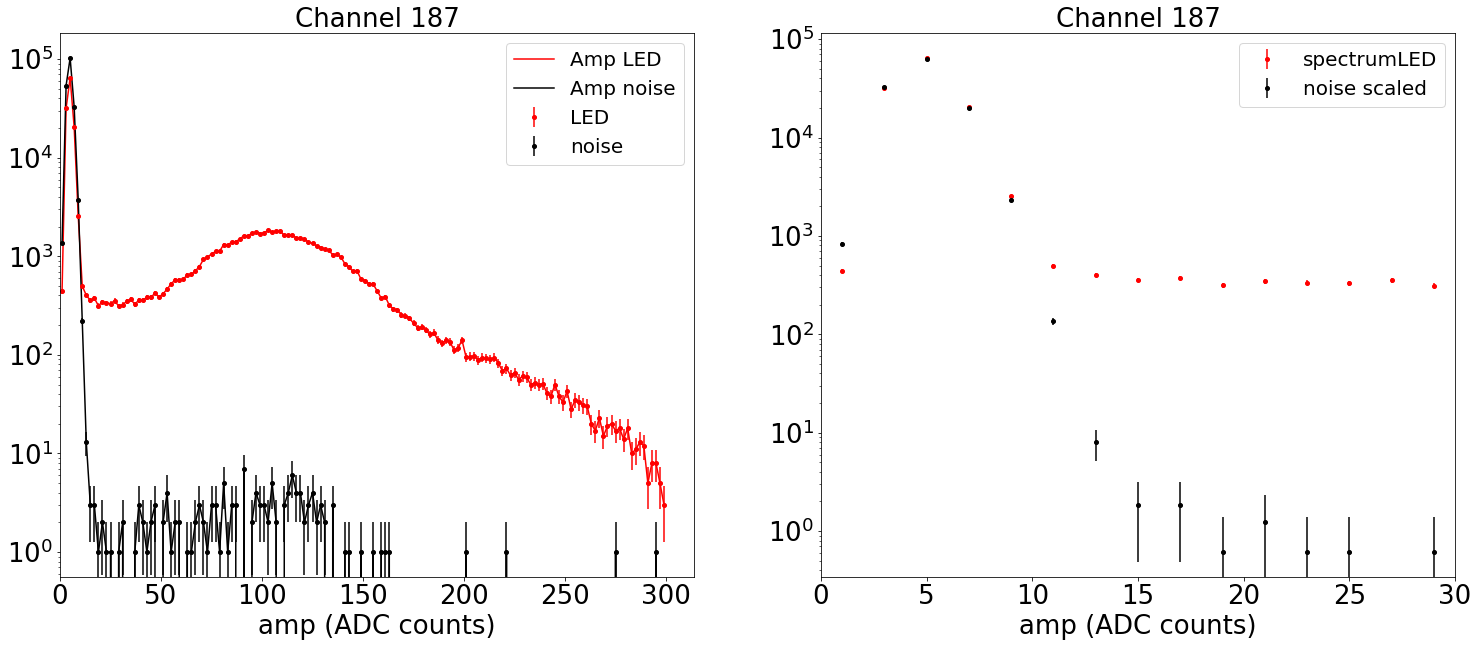

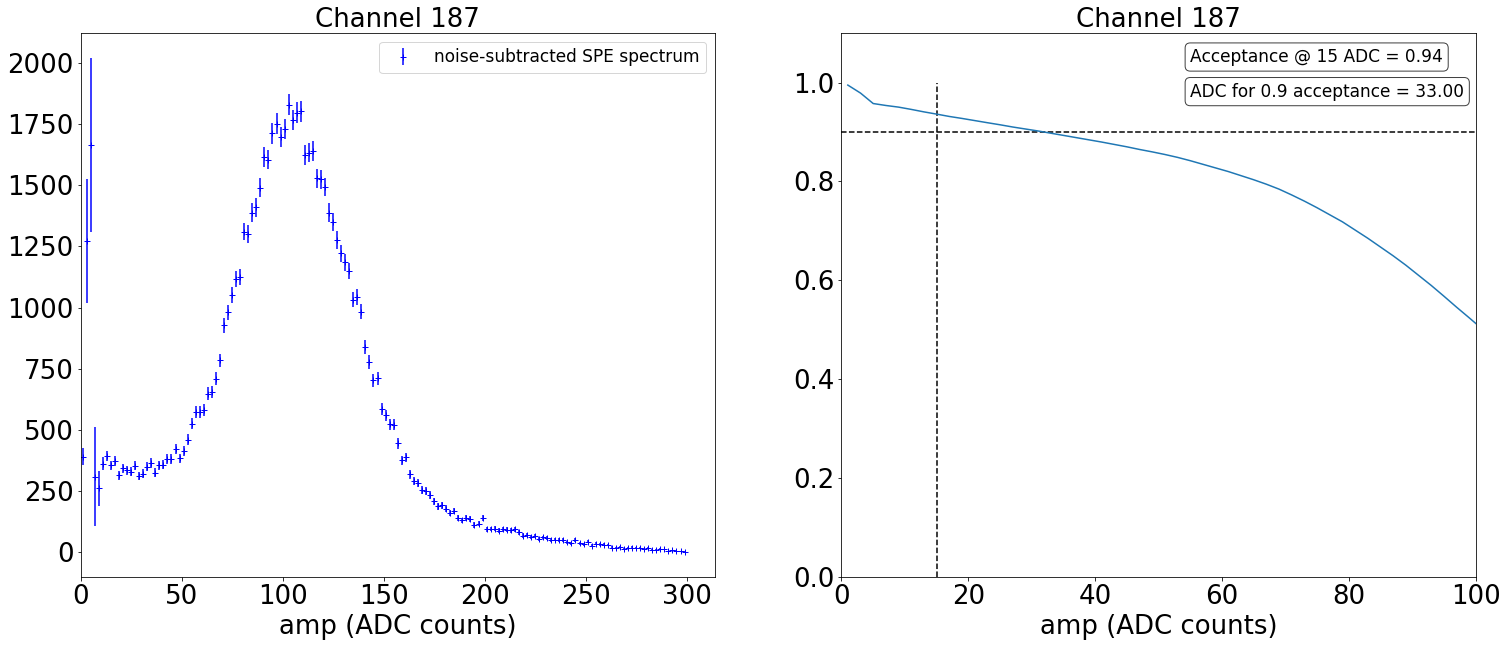

In [24]:
print('#################################################')
print('############### Bin Correction: '+str(bin_correction)+' ###############')
print('#################################################')

fig = plt.figure(figsize=(25,10))
n_channel = 187

plt.subplot(121)

plt.plot(SPE[SPE['pmt']==n_channel]['bins_LED_center'][0], SPE[SPE['pmt']==n_channel]['spectrumLED'][0], 
         color='r', label='Amp LED')
plt.plot(SPE[SPE['pmt']==n_channel]['bins_NOISE_center'][0], SPE[SPE['pmt']==n_channel]['spectrumNOISE'][0], 
         color='k', label='Amp noise')

plt.errorbar(x = SPE[SPE['pmt']==n_channel]['bins_LED_center'][0], y = SPE[SPE['pmt']==n_channel]['spectrumLED'][0], 
             yerr = np.sqrt(SPE[SPE['pmt']==n_channel]['spectrumLED'][0]), fmt='ro', ms = 4, label='LED')

plt.errorbar(x = SPE[SPE['pmt']==n_channel]['bins_NOISE_center'][0],  y = SPE[SPE['pmt']==n_channel]['spectrumNOISE'][0], 
             yerr = np.sqrt(SPE[SPE['pmt']==n_channel]['spectrumNOISE'][0]), fmt='ko', ms = 4, label='noise')

plt.xlabel('amp (ADC counts)', fontsize=26)
plt.title('Channel %d' %n_channel, fontsize=26)
plt.yscale('log')
plt.legend(loc='best', fontsize=20)
plt.xlim(0)

plt.subplot(122)

plt.errorbar(x = SPE[SPE['pmt']==n_channel]['bins_LED_center'][0], y = SPE[SPE['pmt']==n_channel]['spectrumLED'][0], 
             yerr = np.sqrt(SPE[SPE['pmt']==n_channel]['spectrumLED'][0]), fmt='ro', ms = 4, label='spectrumLED')

plt.errorbar(x = SPE[SPE['pmt']==n_channel]['bins_NOISE_center'][0],  
             y = SPE[SPE['pmt']==n_channel]['spectrumNOISE_scaled_'+str(bin_correction)+'bin'][0], 
             yerr = np.sqrt(SPE[SPE['pmt']==n_channel]['spectrumNOISE_scaled_'+str(bin_correction)+'bin'][0]), 
             fmt='ko', ms = 4, label='noise scaled')

plt.xlim(left = 0, right=30)
plt.yscale('log')
plt.xlabel('amp (ADC counts)', fontsize=26)
plt.title('Channel %d' %n_channel, fontsize=26)
plt.legend(loc='best', fontsize=20)


fig = plt.figure(figsize=(25,10))

plt.subplot(121)

plt.errorbar(x = SPE_acceptance[SPE_acceptance['pmt']==n_channel]['bins SPE acceptance '+str(bin_correction)+' bin'][0], 
             y = SPE_acceptance[SPE_acceptance['pmt']==n_channel]['noise-subtracted spectrum '+str(bin_correction)+' bin'][0], 
             yerr = SPE_acceptance[SPE_acceptance['pmt']==n_channel]['error of noise-subtracted spectrum '+str(bin_correction)+' bin'][0], 
             fmt='b+', label='noise-subtracted SPE spectrum')

plt.xlim(left = 0)
plt.xlabel('amp (ADC counts)', fontsize=26)
plt.title('Channel %d' %n_channel, fontsize=26)
plt.legend(loc='best', fontsize=17)

plt.subplot(122)

plt.plot(SPE_acceptance[SPE_acceptance['pmt']==n_channel]['bins SPE acceptance '+str(bin_correction)+' bin'][0], 
         SPE_acceptance[SPE_acceptance['pmt']==n_channel]['SPE acceptance '+str(bin_correction)+' bin'][0]) 

plt.text(55, 1.07, 
         'Acceptance @ 15 ADC = %.2f'%(SPE_acceptance[SPE_acceptance['pmt']==n_channel]['Acceptance @ 15 ADC '+str(bin_correction)+' bin'][0]),
         horizontalalignment='left', verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.75), 
         fontsize=17)

plt.text(55, 1, 
         'ADC for 0.9 acceptance = %.2f'%(SPE_acceptance[SPE_acceptance['pmt']==n_channel]['Threshold for 0.9 acceptance '+str(bin_correction)+' bin'][0]), 
         horizontalalignment='left', verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.75), 
         fontsize=17)

plt.hlines(y=0.9, xmin=0, xmax=100, colors='k', linestyles='dashed')
plt.vlines(x=15, ymin=0, ymax=1, colors='k', linestyles='dashed')
plt.title('Acceptance', fontsize=26)
plt.ylim(0,1.1)
plt.xlim(0, 100)
plt.xlabel('amp (ADC counts)', fontsize=26)
plt.title('Channel %d' %n_channel, fontsize=26)
#plt.legend(loc='best', fontsize=15)

plt.show()